# Titanic Classification

In [1]:
# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings 
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import auc, roc_curve, RocCurveDisplay
import joblib

In [2]:
titanic_data = pd.read_csv('Titanic_Dataset.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titanic_data.shape

(891, 12)

In [7]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [10]:
# Data Visualization
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

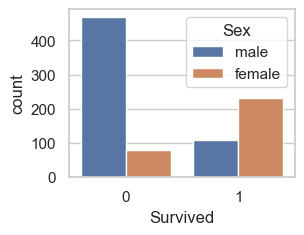

In [11]:
# Bar plot of survival based on gender
plt.subplot(2, 2, 1)
sns.countplot(x='Survived', hue='Sex', data = titanic_data)
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

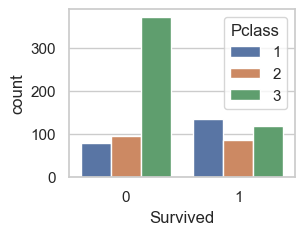

In [12]:
# Bar plot of survival based on passenger class
plt.subplot(2, 2, 2)
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)

<AxesSubplot:xlabel='Age', ylabel='Count'>

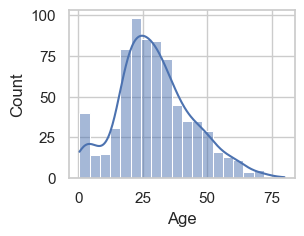

In [13]:
# Age distribution
plt.subplot(2, 2, 3)
sns.histplot(data=titanic_data, x='Age', bins=20, kde=True)

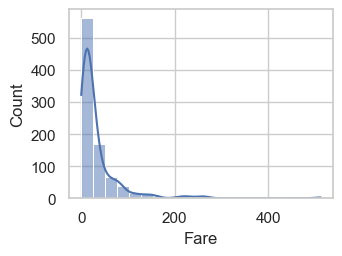

In [14]:
# Fare distribution
plt.subplot(2, 2, 4)
sns.histplot(data=titanic_data, x='Fare', bins=20, kde=True)

plt.tight_layout()
plt.show()

In [15]:
# Data Cleaning
titanic_data.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True)
titanic_data.dropna(inplace=True)

In [16]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [17]:
# Convert categorical variables to numerical using one-hot encoding
titanic_data = pd.get_dummies(titanic_data, columns=['Sex'])

In [18]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,1,0,3,22.0,1,0,7.2500,0,1
1,2,1,1,38.0,1,0,71.2833,1,0
2,3,1,3,26.0,0,0,7.9250,1,0
3,4,1,1,35.0,1,0,53.1000,1,0
4,5,0,3,35.0,0,0,8.0500,0,1


In [19]:
# Separate features and target
X = titanic_data.drop(columns=['Survived'])
y = titanic_data['Survived']

In [20]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Using different classification models for red wine quality prediction

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_lr))
print("Classifiction report:", classification_report(y_test, y_pred_lr))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_lr))

Accuracy score: 0.7622377622377622
Classifiction report:               precision    recall  f1-score   support

           0       0.80      0.80      0.80        87
           1       0.70      0.70      0.70        56

    accuracy                           0.76       143
   macro avg       0.75      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143

Confusion matrix: [[70 17]
 [17 39]]


In [23]:
# K-Nearest Neighbors
knc_model = KNeighborsClassifier(n_neighbors = 3)
knc_model.fit(X_train, y_train)
y_pred_knc = knc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_knc))
print("Classifiction report:", classification_report(y_test, y_pred_knc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_knc))

Accuracy score: 0.6223776223776224
Classifiction report:               precision    recall  f1-score   support

           0       0.66      0.77      0.71        87
           1       0.52      0.39      0.45        56

    accuracy                           0.62       143
   macro avg       0.59      0.58      0.58       143
weighted avg       0.61      0.62      0.61       143

Confusion matrix: [[67 20]
 [34 22]]


In [24]:
# Support Vector Classifier
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_svc))
print("Classifiction report:", classification_report(y_test, y_pred_svc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_svc))

Accuracy score: 0.6503496503496503
Classifiction report:               precision    recall  f1-score   support

           0       0.64      0.99      0.77        87
           1       0.88      0.12      0.22        56

    accuracy                           0.65       143
   macro avg       0.76      0.56      0.50       143
weighted avg       0.73      0.65      0.56       143

Confusion matrix: [[86  1]
 [49  7]]


In [25]:
# Decision Tree Classifier
dtc_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 7)
dtc_model.fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_dtc))
print("Classifiction report:", classification_report(y_test, y_pred_dtc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_dtc))

Accuracy score: 0.6853146853146853
Classifiction report:               precision    recall  f1-score   support

           0       0.78      0.68      0.72        87
           1       0.58      0.70      0.63        56

    accuracy                           0.69       143
   macro avg       0.68      0.69      0.68       143
weighted avg       0.70      0.69      0.69       143

Confusion matrix: [[59 28]
 [17 39]]


In [26]:
# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
y_pred_gnb = gnb_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_gnb))
print("Classifiction report:", classification_report(y_test, y_pred_gnb))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_gnb))

Accuracy score: 0.7692307692307693
Classifiction report:               precision    recall  f1-score   support

           0       0.80      0.83      0.81        87
           1       0.72      0.68      0.70        56

    accuracy                           0.77       143
   macro avg       0.76      0.75      0.76       143
weighted avg       0.77      0.77      0.77       143

Confusion matrix: [[72 15]
 [18 38]]


In [27]:
# Random Forest Classifier 
rfc_model = RandomForestClassifier(random_state = 1)
rfc_model.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_rfc))
print("Classifiction report:", classification_report(y_test, y_pred_rfc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_rfc))

Accuracy score: 0.7902097902097902
Classifiction report:               precision    recall  f1-score   support

           0       0.84      0.82      0.83        87
           1       0.72      0.75      0.74        56

    accuracy                           0.79       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143

Confusion matrix: [[71 16]
 [14 42]]


In [28]:
# XGBoost Classifier
xgbc_model = xgb.XGBClassifier(random_state = 1)
xgbc_model.fit(X_train, y_train)
y_pred_xgbc = xgbc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_xgbc))
print("Classifiction report:", classification_report(y_test, y_pred_xgbc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_xgbc))

Accuracy score: 0.7622377622377622
Classifiction report:               precision    recall  f1-score   support

           0       0.80      0.80      0.80        87
           1       0.70      0.70      0.70        56

    accuracy                           0.76       143
   macro avg       0.75      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143

Confusion matrix: [[70 17]
 [17 39]]


In [29]:
# Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier(random_state = 1)
gbc_model.fit(X_train, y_train)
y_pred_gbc = gbc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_gbc))
print("Classifiction report:", classification_report(y_test, y_pred_gbc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_gbc))

Accuracy score: 0.7902097902097902
Classifiction report:               precision    recall  f1-score   support

           0       0.81      0.85      0.83        87
           1       0.75      0.70      0.72        56

    accuracy                           0.79       143
   macro avg       0.78      0.77      0.78       143
weighted avg       0.79      0.79      0.79       143

Confusion matrix: [[74 13]
 [17 39]]


In [30]:
# Extra Trees Classifier
etc_model = ExtraTreesClassifier()
etc_model.fit(X_train, y_train)
y_pred_etc = etc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_etc))
print("Classifiction report:", classification_report(y_test, y_pred_etc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_etc))

Accuracy score: 0.7622377622377622
Classifiction report:               precision    recall  f1-score   support

           0       0.80      0.80      0.80        87
           1       0.70      0.70      0.70        56

    accuracy                           0.76       143
   macro avg       0.75      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143

Confusion matrix: [[70 17]
 [17 39]]


In [31]:
# Applying Cross Validation Methods on each model

# For Logistic Regression
cv_score = cross_val_score(lr_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_lr) - cv_score.mean())

[0.76223776 0.83916084 0.76923077 0.74825175 0.78169014]
0.7801142519452379
Difference between accuracy score and cross validation score: -0.017876489707475685


In [32]:
# For K-Nearest Neighbors
cv_score = cross_val_score(knc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_knc) - cv_score.mean())

[0.6013986  0.36363636 0.4965035  0.63636364 0.68309859]
0.5562001378902787
Difference between accuracy score and cross validation score: 0.06617748448734373


In [33]:
# For Support Vector Classifier
cv_score = cross_val_score(svc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_svc) - cv_score.mean())

[0.59440559 0.62237762 0.64335664 0.67132867 0.64788732]
0.6358711710824386
Difference between accuracy score and cross validation score: 0.014478479267211686


In [34]:
# For Decision Tree Classifier
cv_score = cross_val_score(dtc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_dtc) - cv_score.mean())

[0.58041958 0.7972028  0.74825175 0.79020979 0.83098592]
0.7494139663153747
Difference between accuracy score and cross validation score: -0.0640992810006894


In [35]:
# For Gaussian Naive Bayes
cv_score = cross_val_score(gnb_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_gnb) - cv_score.mean())

[0.76923077 0.81118881 0.77622378 0.74825175 0.81690141]
0.7843593026691618
Difference between accuracy score and cross validation score: -0.015128533438392489


In [36]:
# For Random Forest Classifier
cv_score = cross_val_score(rfc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_rfc) - cv_score.mean())

[0.68531469 0.81118881 0.82517483 0.76923077 0.82394366]
0.7829705505761844
Difference between accuracy score and cross validation score: 0.007239239633605843


In [37]:
# For XGBoost Classifier
cv_score = cross_val_score(xgbc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_xgbc) - cv_score.mean())

[0.65034965 0.72727273 0.76223776 0.77622378 0.82394366]
0.7480055156111494
Difference between accuracy score and cross validation score: 0.014232246626612821


In [38]:
# For Gradient Boosting Classifier
cv_score = cross_val_score(gbc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_gbc) - cv_score.mean())

[0.61538462 0.7972028  0.7972028  0.78321678 0.84507042]
0.7676154831084409
Difference between accuracy score and cross validation score: 0.022594307101349353


In [39]:
# For Extra Trees Classifier
cv_score = cross_val_score(etc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_etc) - cv_score.mean())

[0.72027972 0.76223776 0.8041958  0.77622378 0.82394366]
0.7773761449817788
Difference between accuracy score and cross validation score: -0.015138382744016576


Decision Tree Classifier has given least difference between accuracy score and cross validation score that is -0.0640992810006894

Decision Tree Classifier model is the best model

In [40]:
# Hyper parameter tuning

# Define the hyperparameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [42]:
# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [44]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [46]:
final_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 1, min_samples_split = 10)
final_model.fit(X_train, y_train)
pred_values = final_model.predict(X_test)
accu_score = accuracy_score(y_test, pred_values)
print(accu_score * 100)

78.32167832167832


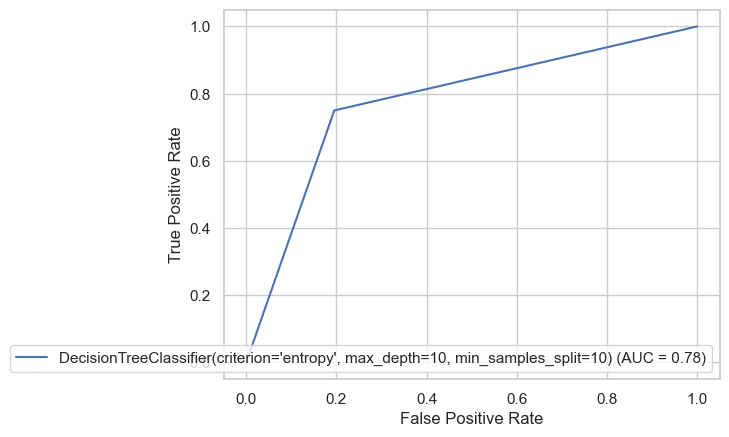

In [47]:
fpr, tpr, thresolds = roc_curve(y_test, pred_values)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = final_model)
display.plot()
plt.show()

In [50]:
new_person_data = pd.DataFrame({
    'Pclass': [3],       # Passenger class (1st, 2nd, or 3rd)
    'Age': [25],         # Age of the person
    'SibSp': [1],        # Number of siblings/spouses aboard
    'Parch': [0],        # Number of parents/children aboard
    'Fare': [20.5],      # Fare paid by the person
    'Sex_female': [0],   # 1 if female, 0 if male
    'Sex_male': [1]      # 1 if male, 0 if female
})

# Use the trained model to predict survival
prediction = final_model.predict(new_person_data)

if prediction[0] == 1:
    print("The model predicts that the person will survive.")
else:
    print("The model predicts that the person will not survive.")

ValueError: X has 7 features, but DecisionTreeClassifier is expecting 8 features as input.